<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Model calibration and fit for sklearn classification<span class="tocSkip"></span></h1>

This notebook illustrates how to calibrate and calculate fit for a variety of sklearn classification models:
* sklearn's LogisticRegression class (which is part of the linear_model family, shared with linear regressions), with and without regularization
* Decision trees: DecisionTreeClassifier 
* Basic ensemble methods: Random Forest and Gradient Boosting

If you are modeling on highly unbalanced data, please also see the separate notebook template for methods to handle unbalanced data. This also includes probability calibration (for tree-based models that may be biased) 

We make use of train-test splits (insample & out-of-sample), and where necessary also cross-validation for purposes of hyperparameter tuning. 

Explicit variable selection is covered in the notebook "sklearn Linear Model Variable Selection". Some models, such as regularized models (LASSO, Elastic Net) and tree-based models have "built-in" feature selection, and are covered in this notebook.

**All sklearn models follow a similar approach:**
1. Instantiate the model class (e.g. LinearRegression, LASSO, RandomForest, etc.) with relevant parameters (e.g. intercept, complexity / regularization penalty)
2. Fit model on the train dataset
3. Apply model on train and test dataset, and explore the model further using e.g. metrics (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) and/or plots such as those provided by the "model diagnostics" template

Some models benefit from hyperparameter tuning as part of Step 1, and we will cover Hyper-Parameter tuning for the model types that most benefit from it.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><span><a href="#Import-key-libraries" data-toc-modified-id="Import-key-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import key libraries</a></span></li><li><span><a href="#Data-import-and-preparation" data-toc-modified-id="Data-import-and-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data import and preparation</a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Dictionary</a></span></li><li><span><a href="#Target-variable-review" data-toc-modified-id="Target-variable-review-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Target variable review</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train-Test split</a></span><ul class="toc-item"><li><span><a href="#Random-train-test-split" data-toc-modified-id="Random-train-test-split-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Random train-test split</a></span></li><li><span><a href="#Stratified-train-test-split" data-toc-modified-id="Stratified-train-test-split-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Stratified train-test split</a></span></li><li><span><a href="#Random-sample-taken-based-on-a-subject-variable-(e.g.-Customer)" data-toc-modified-id="Random-sample-taken-based-on-a-subject-variable-(e.g.-Customer)-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Random sample taken based on a subject variable (e.g. Customer)</a></span></li><li><span><a href="#Time/value-based-splitting" data-toc-modified-id="Time/value-based-splitting-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Time/value based splitting</a></span></li></ul></li><li><span><a href="#Data-transformations" data-toc-modified-id="Data-transformations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data transformations</a></span><ul class="toc-item"><li><span><a href="#Transform-the-train-datasets" data-toc-modified-id="Transform-the-train-datasets-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Transform the train datasets</a></span></li><li><span><a href="#Transform-the-test-dataset" data-toc-modified-id="Transform-the-test-dataset-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Transform the test dataset</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-model-calibration" data-toc-modified-id="Logistic-model-calibration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic model calibration</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression-without-regularization" data-toc-modified-id="Logistic-regression-without-regularization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic regression without regularization</a></span></li><li><span><a href="#Regularization-with-hyperparameter-tuning" data-toc-modified-id="Regularization-with-hyperparameter-tuning-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Regularization with hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Standardizing-the-data" data-toc-modified-id="Standardizing-the-data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Standardizing the data</a></span></li><li><span><a href="#Defining-the-folds-for-cross-validation" data-toc-modified-id="Defining-the-folds-for-cross-validation-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Defining the folds for cross validation</a></span></li><li><span><a href="#Lasso-cross-validation-for-finding-suitable-value-for-parameter-C" data-toc-modified-id="Lasso-cross-validation-for-finding-suitable-value-for-parameter-C-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Lasso cross-validation for finding suitable value for parameter C</a></span></li><li><span><a href="#Lasso-calibration-for-a-single-C-penalty-parameter" data-toc-modified-id="Lasso-calibration-for-a-single-C-penalty-parameter-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Lasso calibration for a single C penalty parameter</a></span></li><li><span><a href="#Ridge-regression-(L2-penalty)" data-toc-modified-id="Ridge-regression-(L2-penalty)-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Ridge regression (L2 penalty)</a></span></li><li><span><a href="#Elastic-Net-hyperparameter-tuning-of-C-and-l1_ratio-parameters" data-toc-modified-id="Elastic-Net-hyperparameter-tuning-of-C-and-l1_ratio-parameters-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Elastic Net hyperparameter tuning of C and l1_ratio parameters</a></span></li><li><span><a href="#Elastic-Net-calibration-for-a-single-C-and-l1_ratio-penalty-parameter-pair" data-toc-modified-id="Elastic-Net-calibration-for-a-single-C-and-l1_ratio-penalty-parameter-pair-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>Elastic Net calibration for a single C and l1_ratio penalty parameter pair</a></span></li></ul></li></ul></li><li><span><a href="#Tree-based-methods" data-toc-modified-id="Tree-based-methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tree-based methods</a></span><ul class="toc-item"><li><span><a href="#Important-note-about-probability-predictions" data-toc-modified-id="Important-note-about-probability-predictions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Important note about probability predictions</a></span></li><li><span><a href="#Binary-decision-tree-classifiers" data-toc-modified-id="Binary-decision-tree-classifiers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Binary decision tree classifiers</a></span><ul class="toc-item"><li><span><a href="#Training-a-single-decision-tree" data-toc-modified-id="Training-a-single-decision-tree-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Training a single decision tree</a></span></li><li><span><a href="#Tuning-the-decision-tree-regression-using-Grid-Search" data-toc-modified-id="Tuning-the-decision-tree-regression-using-Grid-Search-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Tuning the decision tree regression using Grid Search</a></span></li></ul></li><li><span><a href="#Random-Forest-classification" data-toc-modified-id="Random-Forest-classification-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Random Forest classification</a></span><ul class="toc-item"><li><span><a href="#Tuning-the-random-forest-model-using-Grid-Search" data-toc-modified-id="Tuning-the-random-forest-model-using-Grid-Search-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Tuning the random forest model using Grid Search</a></span></li><li><span><a href="#Fit-a-single-random-forest-model" data-toc-modified-id="Fit-a-single-random-forest-model-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Fit a single random forest model</a></span></li><li><span><a href="#Examine-model-performance-across-trees-in-random-forest" data-toc-modified-id="Examine-model-performance-across-trees-in-random-forest-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Examine model performance across trees in random forest</a></span></li></ul></li><li><span><a href="#Gradient-Boosted-Tree-Regression" data-toc-modified-id="Gradient-Boosted-Tree-Regression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Gradient Boosted Tree Regression</a></span><ul class="toc-item"><li><span><a href="#Tuning-the-gradient-boosted-tree-regression-using-Randomized-Search" data-toc-modified-id="Tuning-the-gradient-boosted-tree-regression-using-Randomized-Search-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Tuning the gradient boosted tree regression using Randomized Search</a></span></li><li><span><a href="#Fit-a-single-gradient-boosting-model" data-toc-modified-id="Fit-a-single-gradient-boosting-model-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Fit a single gradient boosting model</a></span></li></ul></li></ul></li><li><span><a href="#Probability-calibration" data-toc-modified-id="Probability-calibration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Probability calibration</a></span><ul class="toc-item"><li><span><a href="#Calibration-curves" data-toc-modified-id="Calibration-curves-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Calibration curves</a></span></li></ul></li><li><span><a href="#Create-a-CSV-file-with-inputs-and-predictions" data-toc-modified-id="Create-a-CSV-file-with-inputs-and-predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create a CSV file with inputs and predictions</a></span></li></ul>

# Import key libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn import linear_model
import warnings
warnings.simplefilter('ignore', category=FutureWarning) # Suppress an error related to pandas
import matplotlib.pyplot as plt
%matplotlib inline

# Formatting of pandas dataframe
pd.options.display.float_format = '{:,.4f}'.format

C:\Users\daniel.wang\AppData\Local\Temp\ipykernel_44648\2507731513.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Automatically update custom py scripts that are loaded in
%load_ext autoreload
%autoreload 2

# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.insert(0, "../../utilities")
from resources.ow_colormap import ow_colormap
from classification import sklearn_classification_tools

# Data import and preparation

We will use a dataset for predicting mortgage loan approvals. 

In [3]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
dataset = pd.read_csv("sample_input/loan_approval_keep_as_zip.zip", low_memory=False)

dataset = dataset.dropna(subset=["LTV"]).reset_index(drop=True) # Remove problematic data

dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.7288,south,direct,1,45.0000
1,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.0197,south,direct,0,46.0000
2,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.3769,North,direct,0,42.0000
3,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.8865,North,direct,0,39.0000
4,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.0893,North,direct,0,40.0000


In [4]:
dataset.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

## Data Dictionary

* ID = Customer ID of Applicant
* year = Year of Application
* loan limit = maximum avaliable amount of the loan allowed to be taken
* Gender = sex type
* approv_in_adv = Is loan pre-approved or not
* loan_type = Type of loan
* loan_purpose = the reason you want to borrow money
* Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
* open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
* business_or_commercial = Usage type of the loan amount
* loan_amount = The exact loan amount
* rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
* Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
* Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
* term = the loan's repayment period
* Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
* interest_only = amount of interest only without principles
* lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
* property_value = the present worth of future benefits arising from the ownership of the property
* construction_type = Collateral construction type
* occupancy_type = classifications refer to categorizing structures based on their usage
* Secured_by = Type of Collatoral
* total_units = number of unites
* income = refers to the amount of money, property, and other transfers of value received over a set period of time
* credit_type = type of credit
* co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
* age = applicant's age
* submission_of_application = Ensure the application is complete or not
* LTV = life-time value (LTV) is a prognostication of the net profit
* Region = applicant's place
* Security_Type = Type of Collatoral
* Status = Loan status (Approved/Declined)
* dtir1 = debt-to-income ratio

## Target variable review

The target variable is 'status', which is either 0 for Approved or 1 for Declined. It can often be more intuitive to set Approval as 1 and Declined as Zero, so we create a variable called 'Approval' for that.

In [5]:
dataset['Status'].value_counts()

Status
0    112029
1     21543
Name: count, dtype: int64

In [6]:
dataset["Approval"] = 1-dataset['Status']
dataset['Approval'].value_counts()

Approval
1    112029
0     21543
Name: count, dtype: int64

## Train-Test split

Classification models identify the relationship between a target variable (also known as dependent variable) and predictive (independent) variables found in the calibration data. 

Very flexible and complex models may misinterpret noise in the data as real signal, and thereby cause the model to overfit to the calibration data. Therefore, it is good practice to understand how the model performs on an 'unseen' portion of the dataset. This type of approach of splitting the data is often called 'train-test' split or in-sample vs. out-of-sample split. The idea is to use the train-sample to select variables and train your model, and review final candidate models on the test-sample to assess model performance. 

If you choose this approach, know that there are many ways to select how to split the data into train and test samples. It is important to keep in mind how the model will be used. 
* If the model is merely a descriptive model of the data you have gathered, then a random train-test split may be relevant
* If your model is used to predict new data, the relationship between the 'new data' and 'current data' should be similar to the relationship between 'test data' and 'train data', so that the model's performance on new data is proxied by the test data. For example:
    * If you are predicting the future of existing subjects (e.g. patients in a hospital), you will want the train-test split to be based on time
    * If you are predicting the outcome of new subjects, you will want the train-test split to be based on subject

**Note: Train-test splitting the data is not the only way to understand if a model is overfitted and its ability to generalize.** 
For example:
* Cross-validation can be a good alternative especially when data is too limited for a train-test split
* Some models have built-in capabilities (e.g. out-of-bag for random forests)

In [7]:
from sklearn.model_selection import train_test_split

y = dataset["Approval"]
X = dataset[['year', 'loan_limit', 'Credit_Score', 'LTV', 'Credit_Worthiness', 'Gender', 'age', 'Region', 'occupancy_type', 'loan_amount', 'dtir1']]

**Below we show a few different ways to split this data**

### Random train-test split

75% train and 25% test dataset, random sampling across all data. The 'random_state' can be set to make it possible to recreate the sampling outcome.

**This is the train-test split we will use in this notebook**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

### Stratified train-test split

Stratified sampling helps ensure the sampling rate to be applied separately to each strata, to improve representativeness to the original (full) dataset.

**Here we stratify based by Year**

In [9]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y, test_size=0.25, stratify=X['Region'], random_state=1000)

pd.DataFrame({"Train": X_train_stratified['Region'].value_counts(), "Test": X_test_stratified['Region'].value_counts()})

,Train,Test
Region,,
North,50651,16884
south,42835,14279
central,5876,1958
North-East,817,272


### Random sample taken based on a subject variable (e.g. Customer)

This approach ensures that every observation per subject (e.g. customer) will be in the same sample. This type of train test splitting is useful when the model will be used to predict for new subjects. 

Here we need to write our own implementation, and in this example we use 'Region' (just to show the code, as Region doesn't make sense to use). There are many ways to accomplish the sampling -- here we use the simplest: random sampling without replacement. 

In [10]:
subject_variable = "Region"
test_size = 0.25
seed = 1000

# This works when there are no missing values for the subject variable
unique_subjects = X[subject_variable].unique()
N_subjects = len(unique_subjects)
np.random.seed(seed)
train_subject_idx = np.where(np.random.uniform(size = N_subjects) > test_size, 1, 0)
train_subject = unique_subjects[train_subject_idx == 1]

train_idx = X[subject_variable].isin(train_subject)
X_train_subject, y_train_subject = X[train_idx], y[train_idx]
X_test_subject, y_test_subject = X[~train_idx], y[~train_idx]

### Time/value based splitting

The train-test split can be done based on the value of a variable. Most frequently this is done using time, using e.g. using the most recent time-period for test sample for a model to be used to forecast into the future.

In this data example, we don't have multiple years, so this code is for illustration

In [11]:
subject_variable = "year"
threshold = 2017

train_idx = X[subject_variable] <= threshold
X_train_time, y_train_time = X[train_idx], y[train_idx]
X_test_time, y_test_time = X[~train_idx], y[~train_idx]

## Data transformations

Many data transformations can be applied to the dataset before performing the train / test split. However, some transformations are data dependent and have parameters that need to be calibrated (e.g. winsorization, median-imputation, standardization) on the train dataset, to make sure the test dataset remains representative of the data that the model will eventually be used on. 
* Here, we will apply the data transformations to the train and then to the test dataset, and for transformations requiring calibration, we will calibrate on train and apply to the test dataset.
* To keep this notebook limited to model calibration and fit, we will apply some data transformations upfront, skipping the data exploration steps (separate templates exist for data diagnostics).

If you will be creating many transformations, We recommend that you look at the data transformation template to see how to create transformation classes that use .fit and .transform (similar to sklearn's transformers).

Lastly, be careful with how you handle missing values. Many models cannot calibrate on missing data, so either impute the missing values (in some cases, you may want to impute the missing value and then create an indicator for whether the value was originally missing) or remove those rows using dropna. If you drop missing values, make sure your X and y datasets are still aligned. 

### Transform the train datasets

Common transformations used include:
* Categorical variables with large number of labels can be condensed to fewer buckets or transformed to a numeric variable using Weight of Evidence (WOE) transformation 
* Create 0-1 indicator variables based on values or intervals of variables
* Impute missings of certain numerical variables to their median (requires calibration on train dataset)
* Perform a functional transformation (log) on certain numerical variables
* Convert categorical variables to 0-1 indicator variables. Keeping all indicators -- some models must have 1 indicator removed to avoid multicollinearity
* Some categorical variables have too many unique values (high cardinality) to be converted to separate 0-1 variables. If categories cannot be grouped up to form a less diverse categorical variable, and the variable is very important, we can consider encoding it by mapping its values to numeric values, based on the target variable in the train data (e.g. Weight of Evidence). This needs to be done carefully (refer to the Data Transformation template for more information)
* Standardize continuous variables to a min of 0 and max of 1. The min and max used are calibrated on train dataset

**Given the simplicity of the dataset, the only transformations done are:**

1. Convert age range into the mid-point of the range
2. log transform loan_amount
3. cap LTV at 120
4. impute missing values with the median value (calibrated to the Train dataset). For categorical, create a missing category
5. convert categorical variables into indicators (one hot encoding)


In [12]:
# Age transformation
age_mapping = {
    "<25": 20,
    "25-34": 30,
    "35-44": 40,
    "45-54": 50,
    "55-64": 60,
    "65-74": 70,
    ">74": 80
}

X_train['age_num'] = X_train['age'].map(age_mapping)

# Loan Amount transformation
X_train['log_loan_amount'] = np.log1p(X_train['loan_amount'])

# LTV cap
X_train['LTV_cap'] = np.where(X_train['LTV'] <75, 75,np.where(X_train['LTV'] > 120, 120, X_train['LTV']))

# Fix missing values for transformed variables
X_train['loan_limit'] = X_train['loan_limit'].fillna("Missing")

age_num_median = X_train['age_num'].median()
X_train['age_num'] = X_train['age_num'].fillna(age_num_median)

dtir1_median = X_train['dtir1'].median()
X_train['dtir1'] = X_train['dtir1'].fillna(dtir1_median)

LTV_median = X_train['LTV_cap'].median()
X_train['LTV_cap'] = X_train['LTV_cap'].fillna(LTV_median)

# Transform categorical to numerical
X_train['loan_limit_is_cf'] = np.where(X_train['loan_limit'] == 'cf', 1, 0)
X_train['Credit_Worthiness_is_l1'] = np.where(X_train['Credit_Worthiness'] == 'l1', 1, 0)
X_train['Is_Principal_Residence'] = np.where(X_train['occupancy_type'] == 'pr', 1, 0)
X_train['Is_Secondary_Residence'] = np.where(X_train['occupancy_type'] == 'sr', 1, 0)
X_train['Is_Investment_Property'] = np.where(X_train['occupancy_type'] == 'ir', 1, 0)
X_train['Region_North'] = np.where(X_train['Region'] == 'North', 1, 0)
X_train['Region_South'] = np.where(X_train['Region'] == 'south', 1, 0)
X_train['Region_Central'] = np.where(X_train['Region'] == 'central', 1, 0)
X_train['Region_NorthEast'] = np.where(X_train['Region'] == 'North-East', 1, 0)


In [13]:
x_num = ['age_num', 'Credit_Score', 'log_loan_amount', 'LTV_cap', 'dtir1', 'LTV_cap', 'loan_limit_is_cf', 'Credit_Worthiness_is_l1', 'Is_Principal_Residence', 'Is_Secondary_Residence', 'Is_Investment_Property', 'Region_North', 'Region_South', 'Region_Central', 'Region_NorthEast']

In [14]:
X_train[x_num].head()

,age_num,Credit_Score,log_loan_amount,LTV_cap,dtir1,LTV_cap,loan_limit_is_cf,Credit_Worthiness_is_l1,Is_Principal_Residence,Is_Secondary_Residence,Is_Investment_Property,Region_North,Region_South,Region_Central,Region_NorthEast
99129,30.0000,802,12.8118,96.9577,39.0000,96.9577,1,1,1,0,0,0,1,0,0
38737,70.0000,813,12.2381,75.0000,31.0000,75.0000,1,1,0,1,0,1,0,0,0
31703,40.0000,596,11.5759,90.2542,20.0000,90.2542,1,1,1,0,0,1,0,0,0
37346,80.0000,804,12.8118,75.0000,40.0000,75.0000,1,1,1,0,0,0,1,0,0
39483,70.0000,855,11.6657,75.0000,37.0000,75.0000,1,1,0,1,0,0,1,0,0


### Transform the test dataset

Here we need to apply the corresponding transformations on the test data. For transformations that required calibration on the train dataset, we re-use the calibrated values. 

If you are building a model for forecasting / extrapolation purposes, you may choose to recalibrate it using all your data as insample at the end, which will mean that the calibrated values such as median

**If we received a new dataset on which to predict, we would apply the transformations just like this**

In [15]:
X_test['age_num'] = X_test['age'].map(age_mapping)
X_test['log_loan_amount'] = np.log1p(X_test['loan_amount'])
X_test['LTV_cap'] = np.where(X_test['LTV'] > 120, 120, X_test['LTV'])
X_test['loan_limit'] = X_test['loan_limit'].fillna("Missing")
X_test['age_num'] =X_test['age_num'].fillna(age_num_median)
X_test['dtir1'] =X_test['dtir1'].fillna(dtir1_median)
X_test['LTV_cap'] =X_test['LTV_cap'].fillna(LTV_median)

# Transform categorical to numerical
X_test['loan_limit_is_cf'] = np.where(X_test['loan_limit'] == 'cf', 1, 0)
X_test['Credit_Worthiness_is_l1'] = np.where(X_test['Credit_Worthiness'] == 'l1', 1, 0)
X_test['Is_Principal_Residence'] = np.where(X_test['occupancy_type'] == 'pr', 1, 0)
X_test['Is_Secondary_Residence'] = np.where(X_test['occupancy_type'] == 'sr', 1, 0)
X_test['Is_Investment_Property'] = np.where(X_test['occupancy_type'] == 'ir', 1, 0)
X_test['Region_North'] = np.where(X_test['Region'] == 'North', 1, 0)
X_test['Region_South'] = np.where(X_test['Region'] == 'south', 1, 0)
X_test['Region_Central'] = np.where(X_test['Region'] == 'central', 1, 0)
X_test['Region_NorthEast'] = np.where(X_test['Region'] == 'North-East', 1, 0)

**When converting categorical variables to a set of indicator variables, it is possible that the test dataset doesn't have all the categories that are available in the train dataset**

This is certainly true if you later apply the model to predict a single data point, and often true when you have some infrequent categories (increasing the chances that all are found in the train data). 

So we may need to create additional indicator variables (all with 0 value) for the test dataset to mirror those in the train dataset. This is done, using 'reindex'. 

In [16]:
X_test[x_num].head()

,age_num,Credit_Score,log_loan_amount,LTV_cap,dtir1,LTV_cap,loan_limit_is_cf,Credit_Worthiness_is_l1,Is_Principal_Residence,Is_Secondary_Residence,Is_Investment_Property,Region_North,Region_South,Region_Central,Region_NorthEast
4463,60.0000,574,12.4549,71.6480,39.0000,71.6480,1,1,1,0,0,1,0,0,0
80936,50.0000,787,13.0950,78.7217,49.0000,78.7217,1,1,1,0,0,0,1,0,0
49204,40.0000,747,12.6651,93.6391,46.0000,93.6391,1,1,1,0,0,0,1,0,0
105527,30.0000,563,12.2854,77.8777,30.0000,77.8777,1,1,1,0,0,1,0,0,0
29162,60.0000,639,13.3947,52.1860,40.0000,52.1860,0,1,1,0,0,1,0,0,0


# Logistic model calibration

This covers calibration and model fit for popular linear models in sklearn, which are found here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Here we will showcase the following:
* Logistic regression (without regularization)
* Regularized regressions:
    * L1 regularization and with hyperparameter tuning (also known as LASSO)
    * L2 regularization and with hyperparameter tuning (also known as Ridge)
    * L1 and L2 regularization, and with hyperparameter tuning (also known as Elastic Net)

These are accomplished using linear_model.LogisticRegression: 
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

Note that sklearn also has Ridge and SVM classifiers, which are not covered here.

A few tips:

When using regularized models, standardization of the data is recommended to avoid favoring certain variables over others due to their scale. In some cases selective standardization can be used to your favor (e.g. to force in specific variables) when using a regularized regression.

Some feature selection techniques rely on coefficient sizes, causing standardization to matter even for non-regularized regressions (see the Variable Selection notebook). 

Non-regularized models require variables to not be fully multicollinear. 

In [17]:
from sklearn import linear_model, metrics

## Logistic regression without regularization

The main parameter you need to specify is whether to use an intercept or not. Intercept is almost always used, unless there is reason to believe that when X = 0 that you also have y = 0.

**Start by instantiating the model class**

In [18]:
logistic_reg = linear_model.LogisticRegression(fit_intercept=True, penalty = None, max_iter = 10000)

**Calibrate the model by fitting on the train dataset for the selected set of variables**

Note that some indicator variables were removed from the x variable list to avoid perfect multicollinearity 

In [19]:
x_variables = ['Credit_Score', 'log_loan_amount', 'LTV_cap', 'dtir1', 'loan_limit_is_cf', 'Credit_Worthiness_is_l1', 'Is_Secondary_Residence', 'Is_Investment_Property', 'Region_North', 'Region_NorthEast', 'Region_Central']

**For logistic regression without regularization, we cannot have extremely multicollinear variables**

The Variance Inflation Factor provides a quick way of checking for this. We want to avoid variables having very high VIF (except in certain circumstances, such as piecewise linear splines of variables). 

In [20]:
sklearn_classification_tools.sklearn_vif(X_train[x_variables])

,Var,VIF
0,Credit_Score,1.0001
1,log_loan_amount,1.0227
2,LTV_cap,1.0538
3,dtir1,1.0278
4,loan_limit_is_cf,1.0202
5,Credit_Worthiness_is_l1,1.0020
6,Is_Secondary_Residence,1.0046
7,Is_Investment_Property,1.0242
8,Region_North,1.0841
9,Region_NorthEast,1.0112


In [21]:
logistic_reg_fitted = logistic_reg.fit(X_train[x_variables], y_train)

**Obtain information about the model, such as coefficients and basic metrics**

In [22]:
# Model coefficients

if logistic_reg_fitted.fit_intercept:
    logistic_coefs = pd.DataFrame({"Feature": list(logistic_reg_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(logistic_reg_fitted.coef_[0]) + [logistic_reg_fitted.intercept_[0]]})
else:
    logistic_coefs = pd.DataFrame({"Feature": logistic_reg_fitted.feature_names_in_, "Coef": logistic_reg_fitted.coef_[0]})
logistic_coefs

,Feature,Coef
0,Credit_Score,-0.0001
1,log_loan_amount,0.4409
2,LTV_cap,-0.0383
3,dtir1,-0.0156
4,loan_limit_is_cf,0.5439
5,Credit_Worthiness_is_l1,0.3279
6,Is_Secondary_Residence,-0.2510
7,Is_Investment_Property,-0.6376
8,Region_North,0.3015
9,Region_NorthEast,-0.1276


**There are two types of predictions**:
* predict_proba: Generates the predicted probability of event (Y=1)
* predict: Generates a 0 or 1 prediction, based on a 50% threshold in probability (this is generally less useful, as when using the probability, you can choose the threshold based on your dataset)

In particular, if your dataset is very unbalanced, even a good model may have low predicted probabilities when Y=1. The notebook on 'model diagnostics and plotting' will go into this further.

In [23]:
# Model in-sample prediction and metrics
logistic_reg_fitted_pred_proba = logistic_reg_fitted.predict_proba(X_train[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(logistic_reg_fitted_pred_proba, y_train, threshold = np.mean(y_train))

In [24]:
prob_metrics

{'roc_auc': 0.6377436367762213,
 'average_precision': 0.88899382234405,
 'efron_r2': 0.04018058803411817,
 'gini': 0.2754872735524425}

In [25]:
class_metrics

{'accuracy': 0.6200600924345422,
 'specificity': 0.5704710482219326,
 'recall': 0.629564865700759,
 'precision': 0.884353173144404,
 'f1': 0.7355189282339207}

In [26]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,9192,6921
Actual 1,31141,52925


**Generate out of sample fit, along with metrics**

In [27]:
# Model in-sample prediction and metrics
logistic_reg_fitted_pred_proba = logistic_reg_fitted.predict_proba(X_test[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(logistic_reg_fitted_pred_proba, y_test, threshold = np.mean(y_train)) # Same threshold as train should be used

In [28]:
prob_metrics

{'roc_auc': 0.6179116326368922,
 'average_precision': 0.8762654895301654,
 'efron_r2': 0.02703061104290505,
 'gini': 0.2358232652737844}

In [29]:
class_metrics

{'accuracy': 0.6681939328601803,
 'specificity': 0.47882136279926335,
 'recall': 0.7049672781890355,
 'precision': 0.8744621390232001,
 'f1': 0.7806201243416624}

In [30]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,2600,2830
Actual 1,8250,19713


## Regularization with hyperparameter tuning

Regularization in logistic regression is a technique used to prevent overfitting, by adding a penalty term to the loss function that the model optimizes during training. 

sklearn's LogisticRegression provides the regulatorization parameter called `C`, where smaller values specify stronger regularization. There are different types of regularization penalties, namely L1 (lasso), L2 (ridge), or a combination of both (elastic net), which can be selected using the `penalty` parameter:
- L1 regularization can lead to coefficients of less useful variables becoming zero, effectively performing feature selection. In contrast
- L2 regularization tends to distribute the penalty among all features, which can lead to more stable models

If both L1 and L2 are used at the same time, `l1_ratio` is used to allocate the `C` to the L1 penalty vs. the L2 penalty. To help set `C` (and `l1_ratio` if relevant), we will use grid search (a basic hyperparameter tuning method) with cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html 

**We also use the standardized data here, since penalties are based on coefficient size. We also don't penalize the intercept since the data is not necessarily balanced.**

### Standardizing the data

In [31]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the train dataframe
scaler.fit(X_train[x_variables])

# Normalize the train dataframe
train_normalized = pd.DataFrame(scaler.transform(X_train[x_variables]), columns=x_variables)

# Normalize the test dataframe using the parameters from the train dataset
test_normalized = pd.DataFrame(scaler.transform(X_test[x_variables]), columns=x_variables)

### Defining the folds for cross validation

Cross-validation folds are segments of data used to evaluate a model's performance. In k-fold cross-validation, the data is split into k parts (so called folds). Each part is used once as a test set while the others form the training set. This process helps ensure that every data point contributes to both training and validation, providing a robust measure of the model's predictive ability on unseen data.

While LogisticRegressionCV can automatically split up your data into folder. You get more control in doing additional analysis per fold when specifying it yourself. There may also be cases when you want to stratify your data by fold.

**Below we define 5 folds**

In [32]:
from sklearn.model_selection import StratifiedKFold
n_folds = 5
cv = StratifiedKFold(n_splits=n_folds)

# Retrieve the fold indices using the same cross-validator
fold_indices = [(train_index, test_index) for train_index, test_index in cv.split(X=train_normalized, y=y_train)]

### Lasso cross-validation for finding suitable value for parameter C

When using LogisticRegressionCV we can ask it to consider 10 different C values (you can also specify manual list of C values to consider if the ones selected automatically are poor)

intercept_scaling inflates the intercept so that it is not materially subjected to the penalty.

we also refit the model on the full dataset in order to calculate the number of variables that would be retained in the model for that C.

In [33]:
from sklearn.linear_model import LogisticRegressionCV

Lasso_CV_model = LogisticRegressionCV(Cs=20, cv=cv, penalty='l1', solver='liblinear', random_state=1000, 
                                      fit_intercept=True, intercept_scaling=1000,
                                      refit=True)

Lasso_CV_outcomes = Lasso_CV_model.fit(train_normalized, y_train)


**Plot the coefficient paths**

This gives you a sense of how the regularization forces coefficients to 0, and can be used to refine the list of C values used

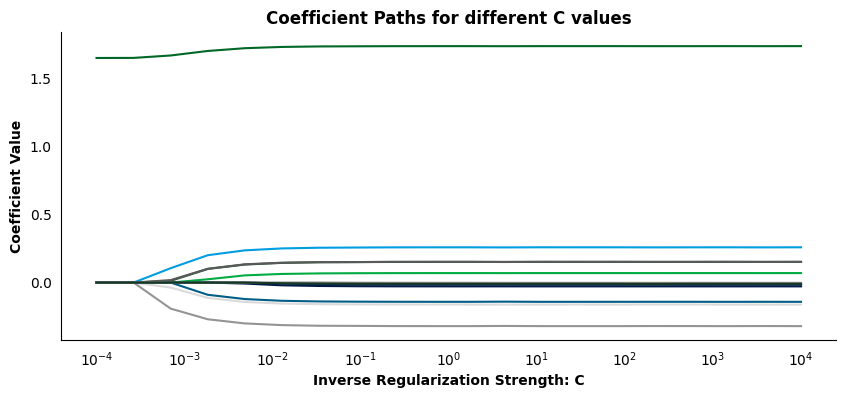

In [34]:
coefs_paths = Lasso_CV_outcomes.coefs_paths_[1][0]
plt.figure(figsize=(10, 4))
for i in range(coefs_paths.shape[1]):
    plt.plot(Lasso_CV_outcomes.Cs_, coefs_paths[:, i], label=f'Coefficient {i+1}')

plt.xscale('log')
plt.xlabel('Inverse Regularization Strength: C')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Paths for different C values')
plt.show()


**We have created a function that gives you various metrics for each value of C**

In [35]:
Lasso_CV_metrics = sklearn_classification_tools.get_LogisticRegressionCV_path(Lasso_CV_outcomes, train_normalized, y_train, cv = cv, threshold = np.mean(y_train))
Lasso_CV_metrics.head()

Working on #1 out of #20 values of C
Working on #2 out of #20 values of C
Working on #3 out of #20 values of C
Working on #4 out of #20 values of C
Working on #5 out of #20 values of C
Working on #6 out of #20 values of C
Working on #7 out of #20 values of C
Working on #8 out of #20 values of C
Working on #9 out of #20 values of C
Working on #10 out of #20 values of C
Working on #11 out of #20 values of C
Working on #12 out of #20 values of C
Working on #13 out of #20 values of C
Working on #14 out of #20 values of C
Working on #15 out of #20 values of C
Working on #16 out of #20 values of C
Working on #17 out of #20 values of C
Working on #18 out of #20 values of C
Working on #19 out of #20 values of C
Working on #20 out of #20 values of C


,C,Accuracy,F1 Score,Average precision,AUC,# Variables
0,0.0001,0.1608,0.0446,0.8391,0.5000,0
1,0.0003,0.1608,0.0446,0.8391,0.5000,1
2,0.0007,0.4311,0.4850,0.8742,0.6105,6
3,0.0018,0.5793,0.6350,0.8873,0.6341,7
4,0.0048,0.6069,0.6588,0.8885,0.6366,8


**We can plot this to get a sense of which C should be used**

The dotted line is what is selected by the cross validation algorithm based on the best values, but you do not need to conform to that one.

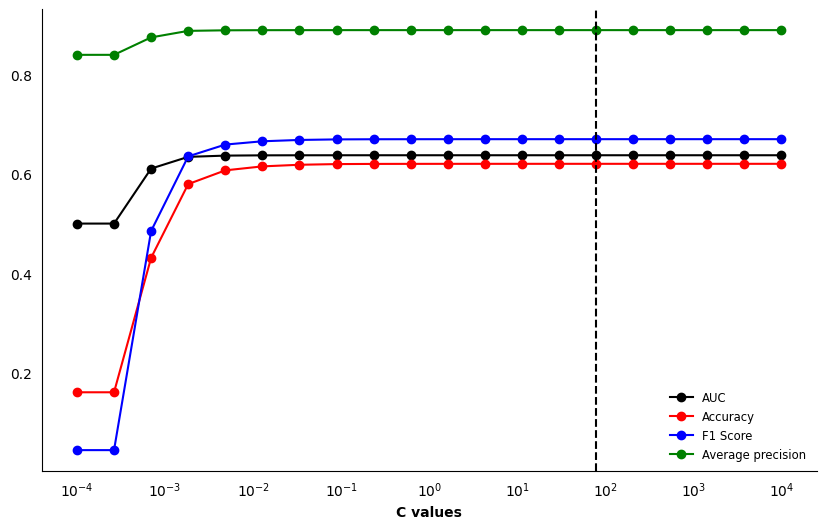

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogx(Lasso_CV_outcomes.Cs_, Lasso_CV_metrics['AUC'], 'k', label='AUC', marker='o')
ax.semilogx(Lasso_CV_outcomes.Cs_, Lasso_CV_metrics['Accuracy'], 'red', label='Accuracy', marker='o')
ax.semilogx(Lasso_CV_outcomes.Cs_, Lasso_CV_metrics['F1 Score'], 'blue', label='F1 Score', marker='o')
ax.semilogx(Lasso_CV_outcomes.Cs_, Lasso_CV_metrics['Average precision'], 'green', label='Average precision', marker='o')
ax.legend()
ax.set_xlabel('C values')
ax.axis('tight')
ax.axvline(Lasso_CV_outcomes.C_, linestyle='--', color='k', label='Chosen C')

Note: One can also use the more general GridSearchCV approach: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

**We can then select one or multiple C values to calibrate the LASSO model**

Lasso_CV also selects the best C value based on cross-validation. Though it is often advisable to review similarly performing models that may be more intuitive without sacrificing model fit.

In [37]:
# Best alpha value selected by cross-validation
Lasso_CV_outcomes.C_[0]

78.47599703514607

### Lasso calibration for a single C penalty parameter

Here we selected a C parameter of 0.01, which has similar fit as the best C value. Since we have determined which C to use, we can go ahead and calibrate the LogisticRegression directly with this C (it would be similar to Section 3.1) 

In [38]:
logistic_regL1 = linear_model.LogisticRegression(fit_intercept=True, C = 0.01, intercept_scaling=1000, penalty='l1', solver='liblinear')
logistic_regL1_fitted = logistic_regL1.fit(train_normalized, y_train)

**Take a look at the coefficients**

In [39]:
# Model coefficients

if logistic_regL1_fitted.fit_intercept:
    logistic_coefs = pd.DataFrame({"Feature": list(logistic_regL1_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(logistic_regL1_fitted.coef_[0]) + [logistic_regL1_fitted.intercept_[0]]})
else:
    logistic_coefs = pd.DataFrame({"Feature": logistic_regL1_fitted.feature_names_in_, "Coef": logistic_regL1_fitted.coef_[0]})
logistic_coefs

,Feature,Coef
0,Credit_Score,-0.0051
1,log_loan_amount,0.2439
2,LTV_cap,-0.3121
3,dtir1,-0.1512
4,loan_limit_is_cf,0.1470
5,Credit_Worthiness_is_l1,0.0610
6,Is_Secondary_Residence,-0.0264
7,Is_Investment_Property,-0.1320
8,Region_North,0.1428
9,Region_NorthEast,-0.0023


**Insample metrics**

In [40]:
# Model in-sample prediction and metrics
logistic_regL1_fitted_pred_proba = logistic_regL1_fitted.predict_proba(train_normalized)[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(logistic_regL1_fitted_pred_proba, y_train, threshold = np.mean(y_train))

In [41]:
prob_metrics, class_metrics

({'roc_auc': 0.6375604065522137,
  'average_precision': 0.8889342264813312,
  'efron_r2': 0.04002664965427438,
  'gini': 0.2751208131044274},
 {'accuracy': 0.6191217720280697,
  'specificity': 0.5717122820083163,
  'recall': 0.6282087883329764,
  'precision': 0.88442859056806,
  'f1': 0.7346186481937431})

In [42]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,9212,6901
Actual 1,31255,52811


**Performance on test data**

In [43]:
# Model in-sample prediction and metrics
logistic_regL1_fitted_pred_proba = logistic_regL1_fitted.predict_proba(test_normalized)[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(logistic_regL1_fitted_pred_proba, y_test, threshold = np.mean(y_train))

In [44]:
prob_metrics, class_metrics

({'roc_auc': 0.6173572266535581,
  'average_precision': 0.8760051911717669,
  'efron_r2': 0.027129096409534204,
  'gini': 0.23471445330711616},
 {'accuracy': 0.6672057017937891,
  'specificity': 0.4790055248618785,
  'recall': 0.7037513857597539,
  'precision': 0.8743113559623245,
  'f1': 0.7798141507004022})

In [45]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,2601,2829
Actual 1,8284,19679


### Ridge regression (L2 penalty)

Ridge regression also uses the 'C' parameter, so hyperparameter tuning can be done the same way as for Lasso (L1). We show the commands here, but don't investigate further (since the steps are the same as for LASSO)

**Cross validation with Ridge regresion**

In [46]:
from sklearn.linear_model import LogisticRegressionCV

Ridge_CV_model = LogisticRegressionCV(Cs=20, cv=cv, penalty='l2', random_state=1000, 
                                      fit_intercept=True, intercept_scaling=1000,
                                      refit=True)

Ridge_CV_outcomes = Ridge_CV_model.fit(train_normalized, y_train)

**Calibration of an individual ridge regression**

In [47]:
logistic_regL2 = linear_model.LogisticRegression(fit_intercept=True, C = 0.01, intercept_scaling=1000, penalty='l2')
logistic_regL2_fitted = logistic_regL2.fit(train_normalized, y_train)

### Elastic Net hyperparameter tuning of C and l1_ratio parameters

Elastic net uses both L1 and L2 penalties, resulting in two penalty parameters. Some algorithms define the L1 and L2 penalties as two separate parameters, whereas sklearn uses 'C' and 'l1_ratio' (between 0 an 1) in the following manner:
* L1 penalty = C * l1_ratio
* L2 penalty = 0.5 * C * (1 - l1_ratio)

To select C and l1_ratio using cross-validation, we consider a 2D grid of C and l1_ratio combinations. 

Since these penalties are based on the size of the coefficients, it is recommended to use standardized data. 

In [48]:
from sklearn.linear_model import LogisticRegressionCV

ElasticNet_CV_model = LogisticRegressionCV(Cs=[0.0001,0.001, 0.01, 0.1, 1, 10], 
                                           l1_ratios = [0.1, 0.25, 0.5, 0.75, 0.9],
                                           cv=cv, penalty='elasticnet', solver='saga', 
                                           random_state=1000, 
                                           fit_intercept=True, intercept_scaling=1000,
                                           refit=True)

ElasticNet_CV_outcomes = ElasticNet_CV_model.fit(train_normalized, y_train)

In [49]:
ElasticNet_metrics = sklearn_classification_tools.get_ElasticNetCV_path(ElasticNet_CV_outcomes, train_normalized, y_train, cv = cv, threshold = np.mean(y_train))
ElasticNet_metrics.head()

Working on #1 out of #5 values of l1_ratios_
Working on #2 out of #5 values of l1_ratios_
Working on #3 out of #5 values of l1_ratios_
Working on #4 out of #5 values of l1_ratios_
Working on #5 out of #5 values of l1_ratios_


,C,l1_ratio,accuracy,f1,auc,precision,non_zero_coefs
0,0.0001,0.1000,0.6113,0.6623,0.6259,0.8827,7
1,0.0010,0.1000,0.6161,0.6663,0.6370,0.8886,10
2,0.0100,0.1000,0.6196,0.6692,0.6373,0.8888,11
3,0.1000,0.1000,0.6201,0.6696,0.6373,0.8888,11
4,1.0000,0.1000,0.6201,0.6696,0.6373,0.8888,11


**We can pick a metric and plot this as a headmap**

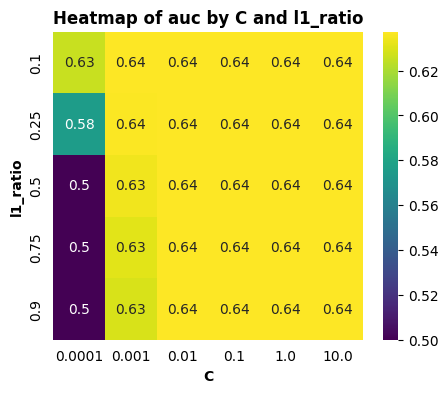

In [50]:
import seaborn as sns

metric = 'auc'
frame = ElasticNet_metrics[[metric, "C", "l1_ratio"]].pivot(index='l1_ratio', columns='C', values=metric)

plt.figure(figsize=(5, 4))  # You can adjust the size as needed
sns.heatmap(frame, annot=True, fmt=".2g", cmap="viridis")  # You can choose your own formatting and color map
plt.title(f"Heatmap of {metric} by C and l1_ratio")
plt.xlabel("C")
plt.ylabel("l1_ratio")
plt.show()

**Nearly all combinations produce strong AUC, other than for the lowest C considered** 

One would look at a few different metrics to help determine which ones is preferred.

**LogisticRegressionCV also generates the best values based on the cross validated results. But you don't necessarily have to use these values**

In [51]:
print(f"Best C: {ElasticNet_CV_outcomes.C_[0]} and best l1_ratio: {ElasticNet_CV_outcomes.l1_ratio_[0]}")

Best C: 1.0 and best l1_ratio: 0.1


### Elastic Net calibration for a single C and l1_ratio penalty parameter pair

Here we select an C and l1_ratio that are reasonable.

In [52]:
C = 0.01
l1_ratio = 0.9

In [53]:
logistic_regEN = linear_model.LogisticRegression(fit_intercept=True, C=C, l1_ratio=l1_ratio, intercept_scaling=1000, penalty='elasticnet', solver='saga')
logistic_regEN_fitted = logistic_regEN.fit(train_normalized, y_train)

In [54]:
# Model coefficients

if logistic_regEN_fitted.fit_intercept:
    logistic_coefs = pd.DataFrame({"Feature": list(logistic_regEN_fitted.feature_names_in_) + ["Intercept"], 
                              "Coef": list(logistic_regEN_fitted.coef_[0]) + [logistic_regEN_fitted.intercept_[0]]})
else:
    logistic_coefs = pd.DataFrame({"Feature": logistic_regEN_fitted.feature_names_in_, "Coef": logistic_regEN_fitted.coef_[0]})
logistic_coefs

,Feature,Coef
0,Credit_Score,-0.0059
1,log_loan_amount,0.2446
2,LTV_cap,-0.3127
3,dtir1,-0.1518
4,loan_limit_is_cf,0.1477
5,Credit_Worthiness_is_l1,0.0616
6,Is_Secondary_Residence,-0.0271
7,Is_Investment_Property,-0.1326
8,Region_North,0.1435
9,Region_NorthEast,-0.0029


**Generate metrics on train and test data** 

In [55]:
# Model in-sample prediction and metrics
logistic_regEN_fitted_pred_proba = logistic_regEN_fitted.predict_proba(train_normalized)[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(logistic_regEN_fitted_pred_proba, y_train, threshold = np.mean(y_train))
prob_metrics, class_metrics

({'roc_auc': 0.6375914226318817,
  'average_precision': 0.8889464624559936,
  'efron_r2': 0.04004311022470752,
  'gini': 0.27518284526376346},
 {'accuracy': 0.619231575479891,
  'specificity': 0.5714640352510395,
  'recall': 0.6283872195655794,
  'precision': 0.8843983860976712,
  'f1': 0.7347302099487472})

In [56]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,9208,6905
Actual 1,31240,52826


# Tree-based methods

Tree-based models do not assume a linear relationship between target variable and independent variables. Instead, it defines breakpoints in the data based on the x-variable value. 

The simplest method is the Binary Decision Tree, where at each internal node, the data is split into two based on the value of the x-variable at the node -- that split point is determined based on a measure of the difference of the target variable value in the corresponding two subsets of data. 

Splits in the tree-based method is determined in a greedy manner, leading to Decision Trees to quickly start overfitting. To overcome this, a number of techniques are available:
* Limiting the complexity of the tree; either upfront, by setting maximum limits on the depth of the tree, minimum number of observations per node to consider a split; or after initial calibration by pruning the tree
* Regularization, by setting a penalty on the complexity of the tree, such that the model fit must improve more than said penalty
* Randomization, e.g. considering a subset of variables for splitting at each node (rather than all variables) or using a subset of data to determine a split
* Ensembling / combining a large number of trees (such as random forest and gradient boosted trees)

**This section will cover Binary Decision Trees, Random Forest, and Gradient Boosting methods from sklearn**

**Note: sklearn's implementation of these do not handle categorical variables** 
Ordinal variables can be coded to a numerical variable, e.g. Low -> 1, Medium -> 2, High -> 3. If you have many categorical variables, consider e.g.:
- Continue to use Random Forest and Gradient Boosting with One-Hot encoding. The number of trees should mitigate the limitation of not being able to use categorical variables as splits directly.
- Using a different ensemble model from sklearn, e.g. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html
- Using an alternative ensembling library: xgboost, lightgbm or catboost
- Use rpart in R (instead of Python) for basic decision trees
- Wait until support for categorical variables becomes available for decision trees, see: https://github.com/scikit-learn/scikit-learn/pull/12866

## Important note about probability predictions

It's important to keep in mind how tree based methods generate probability predictions:
* Decision Tree uses the frequency of the classes in the leaf nodes. When a new instance is fed into the tree for prediction, it traverses the tree based on the decision rules until it reaches a leaf node. The probability of belonging to a certain class is then calculated as the number of training instances of that class in the leaf node divided by the total number of training instances in the leaf.
* In Random Forest, you take the average of the probabilities predicted by all the individual trees. For a given instance, each tree in the forest outputs a probability distribution (as described for a single Decision Tree), and the final probability is the average of these distributions.
* GBMs typically use a logistic loss function, and the trees are learning the log odds of the classes. The predicted probabilities are obtained by passing the combined output of all trees (the sum of the log odds) through the logistic function to convert it into probabilities.

Unlike logistic regression, the **predicted probability may be biased** (typically the average predicted value is different from the average actual value). And this is often exacerbated by the occasional need to balance the data (if the tree splitting logic is based on classification metrics e.g. accuracy rather than probability / likelihood metrics)

So if you are trying to build a model that relies on probabilities, you will want to use probability calibration. It effectively uses a uniform function to map raw probabilities to less biased / unbiased probabilities. A separate section will be dedicated to that.


## Binary decision tree classifiers

In the standard decision tree for classification, the probability prediction for each node is often taken as the . If other error metrics are used, the prediction may be different from the average.

Common reasons a decision is used include:
* Simple model without worrying about non-linearities
* Model easily explained to non-technical clients
* Offers insights on 'segments' within the data

There are certain things to watch out for however, e.g.:
* Model predictions will suddenly jump, as the number of different predictions is limited (based on cutoffs in x-variables)
* X-variables do not have monotone relationship vs. x-variables
* Very easy to overfit the model

Read more about the decision tree here (advantages and disadvantages): https://scikit-learn.org/stable/modules/tree.html 

**Tree based models can handle variables that are multicollinear**

However, if you have many variables that are similar to each other but are important, each such variable may show up very few times in a model / have lower importance. For categorical variables with just two values however, using one of the indicators is enough (since it splits one vs. the other)

In [57]:
original_x_variables = x_variables

x_variables = ['Credit_Score', 'log_loan_amount', 'LTV_cap', 'dtir1', 
               'loan_limit_is_cf', 'Credit_Worthiness_is_l1',
               'Is_Principal_Residence', 'Is_Secondary_Residence', 'Is_Investment_Property', 
               'Region_North', 'Region_South', 'Region_NorthEast', 'Region_Central']

### Training a single decision tree

We need to select the error metric, maximum tree depth, minimum number of observations in a node to be split, minimum samples or proportion in final leafs, maximum number of final leafs, minimum purity decrease to warrant a split, complexity parameter to prune the tree if it gets too large.

For details see the syntax: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Start by instantiating the model class**

In [58]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini',  
                                           max_depth=3, min_samples_split=50, min_samples_leaf=20, 
                                           min_impurity_decrease=0.00001, ccp_alpha=0.001)

**Define variables and fit the model**

In [59]:
decision_tree_fitted = decision_tree.fit(X_train[x_variables], y_train)

**Visualize the tree**

We use the basic plot_tree method. A more advanced tree can be obtained if you have 'graphviz' available, see e.g. https://mljar.com/blog/visualize-decision-tree/

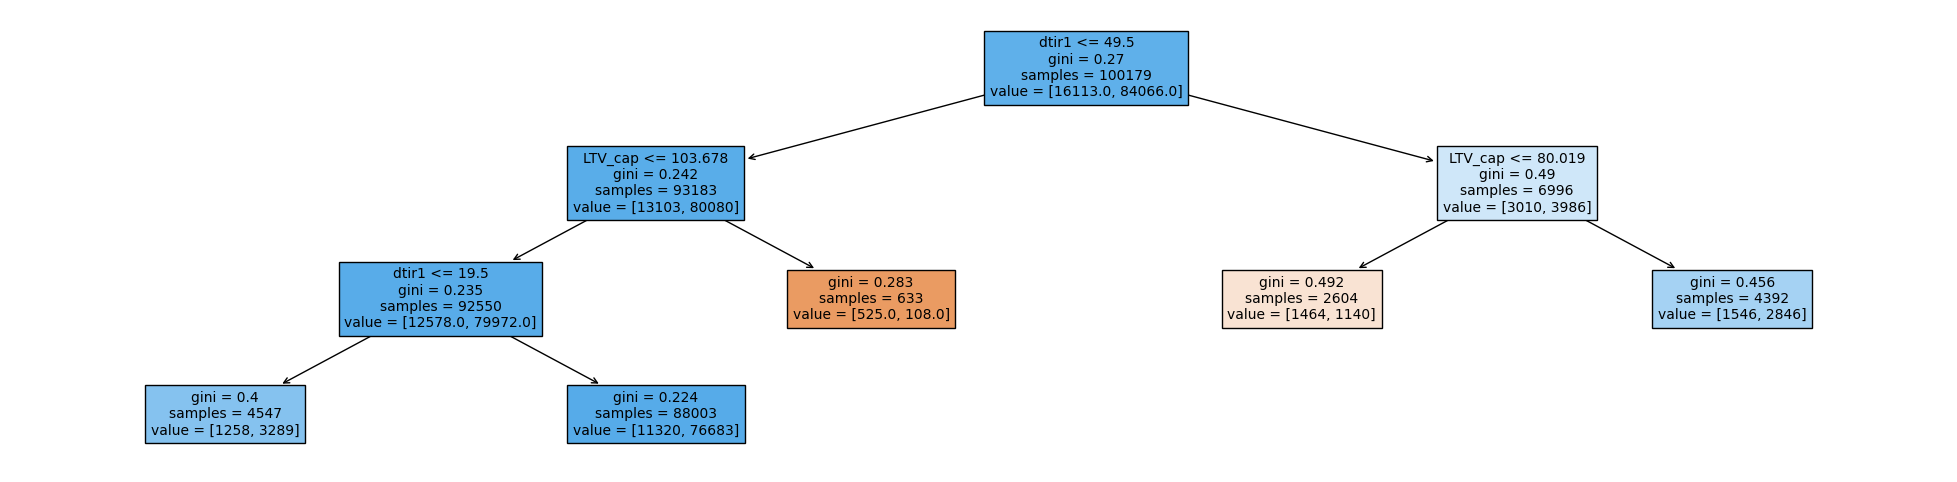

In [60]:
fig, ax = plt.subplots(figsize=(25,6))
tree.plot_tree(decision_tree_fitted, ax=ax, fontsize=10, feature_names=decision_tree_fitted.feature_names_in_, filled=True);

**Generate predictions and metrics on the training data**

In [61]:
# Model in-sample prediction and metrics
decision_tree_train_pred = decision_tree_fitted.predict_proba(X_train[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(decision_tree_train_pred, y_train, threshold = np.mean(y_train))

In [62]:
prob_metrics, class_metrics

({'roc_auc': 0.6087493665394097,
  'average_precision': 0.870085279684065,
  'efron_r2': 0.07508225974396654,
  'gini': 0.2174987330788194},
 {'accuracy': 0.8133041855079408,
  'specificity': 0.2974616769068454,
  'recall': 0.9121761473128256,
  'precision': 0.87136802154472,
  'f1': 0.8913052322033603})

In [63]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,4793,11320
Actual 1,7383,76683


**Generate predictions and metrics on the testing data**

In [64]:
# Model in-sample prediction and metrics
decision_tree_test_pred = decision_tree_fitted.predict_proba(X_test[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(decision_tree_test_pred, y_test, threshold = np.mean(y_train))

In [65]:
prob_metrics, class_metrics

({'roc_auc': 0.6088917221513906,
  'average_precision': 0.8686017510955445,
  'efron_r2': 0.07854516498784136,
  'gini': 0.2177834443027813},
 {'accuracy': 0.8117569550504596,
  'specificity': 0.2974217311233886,
  'recall': 0.9116332296248614,
  'precision': 0.8698263213566725,
  'f1': 0.8902392177405273})

In [66]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,1615,3815
Actual 1,2471,25492


### Tuning the decision tree regression using Grid Search

Grid Search offers a way to test all combinations of specific parameters and their possible values. Every set of parameters will be used to train a model, and the parameters of the best model are typically selected. To avoid overfitting, cross-validation is generally used, and models are compared using the cross-validation metrics. 

Syntax: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

If there are too many combinations of parameter values to test, consider:
* Randomized search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html. See the Gradient Boosting model for an example. 
* Bayesian tuning. It is available in a different library https://scikit-optimize.github.io/stable/, and examples will be provided in a future notebook template.

**Note:** If you have a very large number of variables (especially variables are highly correlated), it is recommended that you also perform some feature selection, as there is high risk of overfitting in a decision tree. You can perform feature selection in many ways. A popular approach is to use some of the more complex methods such as random forest, gradient boosting, or ExtraTrees https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) to find the most important variables.


**Setting the Grid-Search values for the parameters to be tuned**

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,4],
    "min_samples_split":[50,250],
    "min_samples_leaf": [20,100],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
    "ccp_alpha": [0, 0.01, 0.1]
}

# Fixed parameters can also be passed directly in the model instantiation
decision_tree_model = tree.DecisionTreeClassifier(criterion='gini')

decision_tree_tuning = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, scoring="roc_auc", cv=5, verbose=3)

In [68]:
decision_tree_tuning = decision_tree_tuning.fit(X_train[x_variables], y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.613 total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.613 total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.603 total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.604 total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.611 total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=250;, score=0.613 total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.0001, min_

[CV 4/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.568 total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.574 total time=   0.0s
[CV 1/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.652 total time=   0.0s
[CV 2/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.646 total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.636 total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.641 total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.649 total time=

[CV 2/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.572 total time=   0.0s
[CV 3/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.565 total time=   0.0s
[CV 4/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.568 total time=   0.0s
[CV 5/5] END ccp_alpha=0, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.574 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.570 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.572 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.565 to

[CV 1/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.570 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.572 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.565 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.568 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.574 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, score=0.570 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.0001, min_samples_leaf=20, min_samples_split=50;, sc

[CV 4/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.568 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.574 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.570 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.572 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.565 total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.568 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, scor

[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 

[CV 2/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=50;, score=0.500 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, max_depth=4, min_impurity_decrease=0.01, min_samples_leaf=100, min_samples_split=250;, score=0.500 t

**Parse the results from the cross-validation for every combination**

In [69]:
full_results = pd.DataFrame(decision_tree_tuning.cv_results_).drop(columns=['params']).sort_values(by=['mean_test_score'], ascending=False)
full_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.0901,0.0034,0.0077,0.0006,0,4,0.0001,100,250,0.6518,0.6456,0.6360,0.6415,0.6492,0.6448,0.0056,1
14,0.0869,0.0027,0.0082,0.0010,0,4,0.0001,100,50,0.6518,0.6456,0.6360,0.6415,0.6492,0.6448,0.0056,1
12,0.1066,0.0030,0.0100,0.0006,0,4,0.0001,20,50,0.6518,0.6456,0.6360,0.6413,0.6494,0.6448,0.0057,3
13,0.0954,0.0043,0.0083,0.0009,0,4,0.0001,20,250,0.6518,0.6456,0.6360,0.6413,0.6494,0.6448,0.0057,3
19,0.0845,0.0030,0.0076,0.0005,0,4,0.0010,100,250,0.6506,0.6445,0.6348,0.6402,0.6489,0.6438,0.0058,5


**We can identify the parameter set resulting in the best score** or view the scores close to best

In [70]:
# Best
print("Best score: {}".format(decision_tree_tuning.best_score_))
print("Best index: {}".format(decision_tree_tuning.best_index_))
print("Best parameters: {}".format(decision_tree_tuning.best_params_))

Best score: 0.6448166856758847
Best index: 14
Best parameters: {'ccp_alpha': 0, 'max_depth': 4, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [71]:
# All within scores within 1 standard deviation away of the best score (higher score is better for AUC)
full_results.loc[full_results['mean_test_score'] + full_results['std_test_score'] > decision_tree_tuning.best_score_]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.0901,0.0034,0.0077,0.0006,0,4,0.0001,100,250,0.6518,0.6456,0.6360,0.6415,0.6492,0.6448,0.0056,1
14,0.0869,0.0027,0.0082,0.0010,0,4,0.0001,100,50,0.6518,0.6456,0.6360,0.6415,0.6492,0.6448,0.0056,1
12,0.1066,0.0030,0.0100,0.0006,0,4,0.0001,20,50,0.6518,0.6456,0.6360,0.6413,0.6494,0.6448,0.0057,3
13,0.0954,0.0043,0.0083,0.0009,0,4,0.0001,20,250,0.6518,0.6456,0.6360,0.6413,0.6494,0.6448,0.0057,3
19,0.0845,0.0030,0.0076,0.0005,0,4,0.0010,100,250,0.6506,0.6445,0.6348,0.6402,0.6489,0.6438,0.0058,5
18,0.0821,0.0019,0.0076,0.0005,0,4,0.0010,100,50,0.6506,0.6445,0.6348,0.6402,0.6489,0.6438,0.0058,5
17,0.0875,0.0025,0.0080,0.0000,0,4,0.0010,20,250,0.6506,0.6445,0.6348,0.6402,0.6489,0.6438,0.0058,5
16,0.0885,0.0033,0.0078,0.0004,0,4,0.0010,20,50,0.6506,0.6445,0.6348,0.6402,0.6489,0.6438,0.0058,5


**You can then train a single decision tree for selected trees**

If there is demand, we can create a function that quickly compares the structure and variables in multiple decision trees.

## Random Forest classification

A Random Forest model is built as a collection of independently developed decision trees, where the simple average is taken as the prediction. Each tree has a degree of randomness, to avoid every tree becoming the same one (e.g. by sampling a subset of data for each tree, and subset of variables to consider for splitting at each node). 

The independence across trees allows the expected outcome to stay constant while variance of outcome is reduced as the number of trees increase. Thereby addressing the issues with instability of individual decision trees. 

As a model that aggregates a number of separate models (decision trees), Random Forest is a so-called Ensemble. It has the same parameters as a single decision tree, plus a number of ensembling parameters:
* Number of trees
* Sampling rate of dataset for building each tree. A benefit of sampling the data for use in each tree, is that each tree will naturally have its own 'out of sample' dataset, so-called "Out-Of-Bag", that can be used to measure performance without cross-validation. (Cross-validation is still the norm for hyperparameter tuning)

See syntax here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Tuning the random forest model using Grid Search

We use Grid Search here, though the following are also good options given the very many parameters to consider:
* Randomized search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html. See the Gradient Boosting model for an example of this.
* Bayesian tuning. It is available in a different library https://scikit-optimize.github.io/stable/, and examples will be provided in a future notebook template.

(Read more about Hyperparameter tuning in the Decision Tree section)

There are many scoring options available. When using AUC, it is OK for the dataset to not be balanced. But for metrics that uses the predicted classification instead of the predicted probability, then using `class_weight='balanced'` is preferred

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

param_grid = {
    "n_estimators": [50],
    "max_samples": [0.5],
    "max_depth": [2,5],
    "min_samples_split":[25, 250],
    "min_samples_leaf": [25],
    "min_impurity_decrease": [0.000001, 0.0001, 0.01],
    "ccp_alpha": [0.1, 0.001]
}
# Fixed parameters can also be passed directly in the model instantiation
random_forest_model = ensemble.RandomForestClassifier(criterion='gini', bootstrap=True) # , class_weight='balanced')

random_forest_tuning = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring="roc_auc", cv=5, verbose=3)
random_forest_tuning = random_forest_tuning.fit(X_train[x_variables], y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.500 total time=   0.5s
[CV 2/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.500 total time=   0.5s
[CV 3/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.500 total time=   0.5s
[CV 4/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.500 total time=   0.5s
[CV 5/5] END ccp_alpha=0.1, max_depth=2, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.500 total time=   0.5s
[CV 1/5] END ccp_alpha=0.1, max_depth=2, ma

[CV 2/5] END ccp_alpha=0.1, max_depth=5, max_samples=0.5, min_impurity_decrease=0.0001, min_samples_leaf=25, min_samples_split=250, n_estimators=50;, score=0.500 total time=   0.7s
[CV 3/5] END ccp_alpha=0.1, max_depth=5, max_samples=0.5, min_impurity_decrease=0.0001, min_samples_leaf=25, min_samples_split=250, n_estimators=50;, score=0.500 total time=   0.6s
[CV 4/5] END ccp_alpha=0.1, max_depth=5, max_samples=0.5, min_impurity_decrease=0.0001, min_samples_leaf=25, min_samples_split=250, n_estimators=50;, score=0.500 total time=   0.6s
[CV 5/5] END ccp_alpha=0.1, max_depth=5, max_samples=0.5, min_impurity_decrease=0.0001, min_samples_leaf=25, min_samples_split=250, n_estimators=50;, score=0.500 total time=   0.7s
[CV 1/5] END ccp_alpha=0.1, max_depth=5, max_samples=0.5, min_impurity_decrease=0.01, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.500 total time=   0.4s
[CV 2/5] END ccp_alpha=0.1, max_depth=5, max_samples=0.5, min_impurity_decrease=0.01, min_samples_

[CV 3/5] END ccp_alpha=0.001, max_depth=5, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.681 total time=   0.7s
[CV 4/5] END ccp_alpha=0.001, max_depth=5, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.690 total time=   0.7s
[CV 5/5] END ccp_alpha=0.001, max_depth=5, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=25, n_estimators=50;, score=0.700 total time=   0.8s
[CV 1/5] END ccp_alpha=0.001, max_depth=5, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=250, n_estimators=50;, score=0.684 total time=   0.8s
[CV 2/5] END ccp_alpha=0.001, max_depth=5, max_samples=0.5, min_impurity_decrease=1e-06, min_samples_leaf=25, min_samples_split=250, n_estimators=50;, score=0.689 total time=   0.8s
[CV 3/5] END ccp_alpha=0.001, max_depth=5, max_samples=0.5, min_impurity_decrease=1e-06, min_

**Parsing the results and viewing the hyperparameters with the best score**

In [73]:
full_results = pd.DataFrame(random_forest_tuning.cv_results_).drop(columns=['params']).sort_values(by=['mean_test_score'], ascending=False)
full_results.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_samples,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.5649,0.0660,0.0179,0.0022,0.1000,2,0.5000,0.0100,25,250,50,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,13
4,0.4758,0.0240,0.0153,0.0005,0.1000,2,0.5000,0.0100,25,25,50,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,13
3,0.5878,0.0436,0.0162,0.0010,0.1000,2,0.5000,0.0001,25,250,50,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,13
2,0.5761,0.0313,0.0161,0.0007,0.1000,2,0.5000,0.0001,25,25,50,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,13
0,0.5876,0.0127,0.0156,0.0005,0.1000,2,0.5000,0.0000,25,25,50,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,13


In [74]:
# Best
print("Best score: {}".format(random_forest_tuning.best_score_))
print("Best index: {}".format(random_forest_tuning.best_index_))
print("Best parameters: {}".format(random_forest_tuning.best_params_))

Best score: 0.6910823437034928
Best index: 18
Best parameters: {'ccp_alpha': 0.001, 'max_depth': 5, 'max_samples': 0.5, 'min_impurity_decrease': 1e-06, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 50}


### Fit a single random forest model

We can fit a single random forest model by specifying the parameters it should have. The number of trees can be set higher than needed, as you can trace the model performance as the number of trees increases.

Here, we use the best parameters from the Hyper-Parameter tuning above. Instead of typing out each argument, we can use a dictionary to pass the parameters to the function, with help of the ** symbol)

In [75]:
best_parameters = {'ccp_alpha': 0.001, 'max_depth': 5, 'max_samples': 0.5, 'min_impurity_decrease': 0.0001, 
                   'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 500}
random_forest_model = ensemble.RandomForestClassifier(criterion='gini', bootstrap=True, **best_parameters, 
                                                      oob_score=True, verbose=2) #, class_weight='balanced')

# Fit the model
random_forest_model_fitted = random_forest_model.fit(X_train[x_variables], y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.8s


building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    3.4s


building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    7.6s


building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500


**Variable importance**

We can't easily visualize a random forest with hundreds of trees like we could for a single decision tree, and we don't have variable coefficients like a linear model. Therefore, we need other techniques to understand the importance of each variable in the model.

Variable importance (a.k.a. feature importance) is therefore often calculated, and measure the impact of a variable on the model fit. The RandomForestRegressor provides a simple estimate of feature importance, based on the (normalized) total reduction of the error term brought by that feature. 

This estimate doesn't work well for features with very many unique values (e.g. continuous variables). Sklearn provides a model-agnostic feature importance metric, based on the impact of a variable on model fit if that variable is permutated (shuffled). This is accomplished using https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance and is covered in the notebook for Model Interpretation 

In [76]:
pd.DataFrame({"Variable": random_forest_model_fitted.feature_names_in_, "Importance": random_forest_model_fitted.feature_importances_}).sort_values(by="Importance", ascending=False)

,Variable,Importance
3,dtir1,0.5074
2,LTV_cap,0.3437
1,log_loan_amount,0.0955
9,Region_North,0.0167
4,loan_limit_is_cf,0.0150
6,Is_Principal_Residence,0.0066
8,Is_Investment_Property,0.0059
10,Region_South,0.0059
5,Credit_Worthiness_is_l1,0.0019
12,Region_Central,0.0012


**Model performance on the out of bag data in the train dataset**

In [77]:
random_forest_train_pred = random_forest_model_fitted.oob_decision_function_[:,1]
prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(random_forest_train_pred, y_train, threshold = np.mean(y_train))

In [78]:
prob_metrics, class_metrics

({'roc_auc': 0.6890792455099317,
  'average_precision': 0.906887123114113,
  'efron_r2': 0.06957969014805354,
  'gini': 0.37815849101986343},
 {'accuracy': 0.7319298455764182,
  'specificity': 0.4969279463787004,
  'recall': 0.7769728546618133,
  'precision': 0.8895986271331872,
  'f1': 0.8294801541694976})

In [79]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,8007,8106
Actual 1,18749,65317


**Model performance on the train dataset**

If the data is balanced, then you should may a 0.5 threshold instead of the average(actual)

In [80]:
random_forest_train_pred = random_forest_model_fitted.predict_proba(X_train[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(random_forest_train_pred, y_train, threshold = np.mean(y_train))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.9s


In [81]:
prob_metrics, class_metrics

({'roc_auc': 0.692056129532055,
  'average_precision': 0.9090486025393343,
  'efron_r2': 0.07032804953981708,
  'gini': 0.38411225906410995},
 {'accuracy': 0.7310813643577996,
  'specificity': 0.5030099919319804,
  'recall': 0.7747959936240573,
  'precision': 0.8905143419649449,
  'f1': 0.8286346750801485})

In [82]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,8105,8008
Actual 1,18932,65134


**Model performance on the test dataset**

In [83]:
random_forest_test_pred = random_forest_model_fitted.predict_proba(X_test[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(random_forest_test_pred, y_test, threshold = np.mean(y_train))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.2s


In [84]:
prob_metrics, class_metrics

({'roc_auc': 0.6898257128648493,
  'average_precision': 0.9062046280594545,
  'efron_r2': 0.07242371125727542,
  'gini': 0.37965142572969857},
 {'accuracy': 0.7263498337975025,
  'specificity': 0.501841620626151,
  'recall': 0.769946000071523,
  'precision': 0.8883845677738808,
  'f1': 0.8249358212958351})

In [85]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,2725,2705
Actual 1,6433,21530


### Examine model performance across trees in random forest

Random Forest models do not overfit as the number of trees increases, but it is often useful to understand how model performance evolves as the number of trees increases, to limit model complexity / computational effort.

While we can access each individual tree of a fitted random forest using: random_forest_model_fitted.estimators_ to generate predictions for each tree, it doesn't give us access to the out-of-bag prediction. 

To generate the out-of-bag predictions, we need to run Random Forest in an incremental manner, one tree at a time. This is easily accomplished using the "warm_start" argument. 

In [86]:
min_trees = 20
max_trees = 100
step_size = 10

RF_model = ensemble.RandomForestClassifier(criterion='gini', bootstrap=True, oob_score=True,
                                          ccp_alpha = 0.01, max_depth = 3, 
                                          max_samples = 0.5, min_impurity_decrease = 0.0001,
                                          min_samples_leaf = 25, min_samples_split = 25)

error_rate = []

for n_tree in range(min_trees, max_trees + 1, step_size):
    print("Number of trees: {}".format(n_tree))
    
    _ = RF_model.set_params(n_estimators=n_tree, warm_start = True if n_tree != min_trees else False)
    _ = RF_model.fit(X_train[x_variables], y_train)
    
    oob_score = RF_model.oob_score_
    
    # Record the OOB Gini
    error_rate.append((n_tree, oob_score))

results = pd.DataFrame(error_rate, columns=["# Trees", "Gini"])
results

Number of trees: 20
Number of trees: 30
Number of trees: 40
Number of trees: 50
Number of trees: 60
Number of trees: 70
Number of trees: 80
Number of trees: 90
Number of trees: 100


,# Trees,Gini
0,20,0.8392
1,30,0.8392
2,40,0.8392
3,50,0.8392
4,60,0.8392
5,70,0.8392
6,80,0.8392
7,90,0.8392
8,100,0.8392


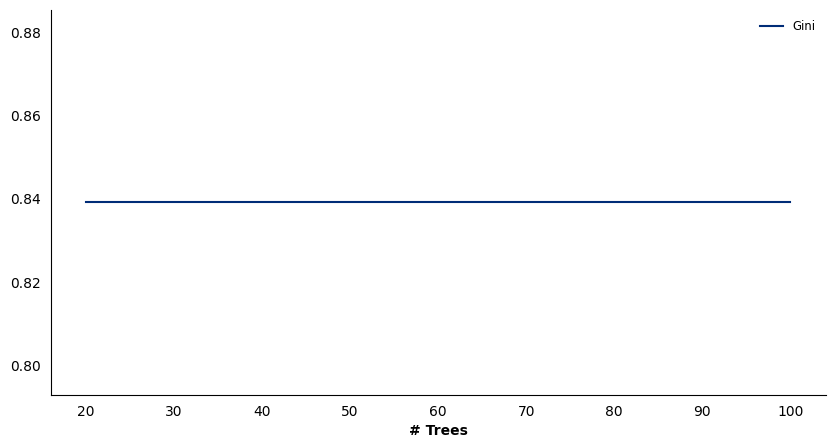

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
results.plot(x="# Trees", y="Gini", kind='line', ax=ax)
ax.legend(loc="upper right");

**In this example, some more trees may be useful to improve stability**

An even more complete example can be found here: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

## Gradient Boosted Tree Regression

Gradient Boosted Models (GBM) work in an entirely different way compared to Random Forest Models, even though they are also built using a large number of small trees. 

Gradient Boosted Trees are decision trees that are built iteratively and not independently, where each subsequent tree attempts to predict the residuals of the sum of the prior trees, and thereby theoretically improving the overall fit. The total sum across all trees generates the prediction. 

The basic Gradient Boosted Tree has some drawbacks over more sophisticated methods:
* Susceptible to overfitting (early stopping can be adopted to avoid too many trees)
* Cannot be parallelized, since each tree is dependent on the prior trees

Popular gradient boosting algorithms include xgboost, lightgbm, cat-boost have superior performance and speed. We will cover these in other notebook templates. 

**Parameters**

GBT have additional parameters compared to a single decision tree:
* **Number of trees** (Random Forest has this too)
* **Subsampling rate** for each tree, which is 100% for basic gradient boosting (unlike Random Forest, where a smaller fraction is expected)
* **Fraction of dataset** to set aside for validation, which is used for early stopping 
* **Stopping criteria**, set as number of iterations without improvement to validation fit, where amount of required improvement is provided as a **tolerance** value
* **Learning rate** applied to each incremental tree to limit its contribution. There is a trade-off between learning rate and number of trees. Too high learning rate may risk overfitting easier

For syntax, see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

Read more about early stopping here: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html


### Tuning the gradient boosted tree regression using Randomized Search

Given the large number of different parameters to set for Gradient Boosted Tree regression, we will use Randomized Search instead of Grid Search. Another popular method is Bayesian Search, which is not offered by sklearn, and is covered in a separate template for advanced tuning and feature selection. 

Overall, RandomizedSearchCV is set up similar to GridSearchCV (covered in Decision Tree and Random Forest sections), but instead of traversing all combinations of parameters, it randomizes the selection of parameter values. Note:
* Possible values for a parameter can be provided as a list, or as a distribution. If any parameter range is provided as a distribution, sampling will always be 'with replacement', and if not, it will be 'without replacement'. It is highly recommended to use distributions for continuous variables. 


Syntax: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from scipy.stats import uniform


param_distributions = {
    "n_estimators": [100],
    "subsample": [1],
    "learning_rate": uniform(loc=0.1,scale=0.5),
    "max_depth": [2,3,4,5],
    "min_samples_split":uniform(loc=0,scale=0.1),
    "min_samples_leaf":uniform(loc=0,scale=0.1),
    "min_impurity_decrease": uniform(loc=0,scale=0.1),
    "ccp_alpha": uniform(loc=0,scale=0.1),
    "max_features": ['sqrt', 0.5],
}

# Fixed parameters can also be passed directly in the model instantiation
gradient_boosting_model = ensemble.GradientBoostingClassifier(criterion='friedman_mse', validation_fraction=0.1, n_iter_no_change=10)

gradient_boosting_tuning = RandomizedSearchCV(gradient_boosting_model, param_distributions, 
                                              n_iter = 50, cv = 5, random_state=1000, verbose=2)
gradient_boosting_tuning = gradient_boosting_tuning.fit(X_train[x_variables], y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ccp_alpha=0.06535895854646095, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impurity_decrease=0.04821914014279982, min_samples_leaf=0.08724745351820354, min_samples_split=0.021233268092271995, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.06535895854646095, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impurity_decrease=0.04821914014279982, min_samples_leaf=0.08724745351820354, min_samples_split=0.021233268092271995, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.06535895854646095, learning_rate=0.15750347156220287, max_depth=5, max_features=sqrt, min_impurity_decrease=0.04821914014279982, min_samples_leaf=0.08724745351820354, min_samples_split=0.021233268092271995, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.06535895854646095, learning_rate=0.15750347156220287, max_depth=5, max_features=sqr

[CV] END ccp_alpha=0.06979251004097192, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0181007510273703, min_samples_leaf=0.04324991717920135, min_samples_split=0.0018143202754672628, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.06979251004097192, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0181007510273703, min_samples_leaf=0.04324991717920135, min_samples_split=0.0018143202754672628, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.06979251004097192, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0181007510273703, min_samples_leaf=0.04324991717920135, min_samples_split=0.0018143202754672628, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.06979251004097192, learning_rate=0.2991024417629675, max_depth=3, max_features=sqrt, min_impurity_decrease=0.0181007510273703, min_samples_leaf=0.04

[CV] END ccp_alpha=0.06870890139224495, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04203220780992133, min_samples_leaf=0.08026305910699383, min_samples_split=0.05386175653186749, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=0.06870890139224495, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04203220780992133, min_samples_leaf=0.08026305910699383, min_samples_split=0.05386175653186749, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=0.06870890139224495, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04203220780992133, min_samples_leaf=0.08026305910699383, min_samples_split=0.05386175653186749, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=0.06870890139224495, learning_rate=0.4511176437366383, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04203220780992133, min_samples_leaf=0.0802

[CV] END ccp_alpha=0.07938221976974498, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04825844931634287, min_samples_leaf=0.04764776103724863, min_samples_split=0.044603283044001046, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.07938221976974498, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04825844931634287, min_samples_leaf=0.04764776103724863, min_samples_split=0.044603283044001046, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.07938221976974498, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04825844931634287, min_samples_leaf=0.04764776103724863, min_samples_split=0.044603283044001046, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.07938221976974498, learning_rate=0.4627015749441883, max_depth=3, max_features=sqrt, min_impurity_decrease=0.04825844931634287, min_samples_leaf=0.0

[CV] END ccp_alpha=0.034935635039254787, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.003097445999927839, min_samples_leaf=0.032416908981897474, min_samples_split=0.028659274764898823, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=0.034935635039254787, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.003097445999927839, min_samples_leaf=0.032416908981897474, min_samples_split=0.028659274764898823, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=0.034935635039254787, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.003097445999927839, min_samples_leaf=0.032416908981897474, min_samples_split=0.028659274764898823, n_estimators=100, subsample=1; total time=   0.2s
[CV] END ccp_alpha=0.034935635039254787, learning_rate=0.23684062968947708, max_depth=4, max_features=sqrt, min_impurity_decrease=0.003097445999927839, min_s

[CV] END ccp_alpha=0.012855847210937455, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.03332364750648185, min_samples_leaf=0.07921640161408444, min_samples_split=0.024434692768040125, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.012855847210937455, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.03332364750648185, min_samples_leaf=0.07921640161408444, min_samples_split=0.024434692768040125, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.012855847210937455, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.03332364750648185, min_samples_leaf=0.07921640161408444, min_samples_split=0.024434692768040125, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.012855847210937455, learning_rate=0.22025158745576287, max_depth=4, max_features=0.5, min_impurity_decrease=0.03332364750648185, min_samples_leaf

[CV] END ccp_alpha=0.01848665076682864, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.00336661328342448, min_samples_leaf=0.007204403481688349, min_samples_split=0.06369458017871925, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=0.01848665076682864, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.00336661328342448, min_samples_leaf=0.007204403481688349, min_samples_split=0.06369458017871925, n_estimators=100, subsample=1; total time=   0.4s
[CV] END ccp_alpha=0.01848665076682864, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.00336661328342448, min_samples_leaf=0.007204403481688349, min_samples_split=0.06369458017871925, n_estimators=100, subsample=1; total time=   0.3s
[CV] END ccp_alpha=0.01848665076682864, learning_rate=0.5172281166492838, max_depth=3, max_features=0.5, min_impurity_decrease=0.00336661328342448, min_samples_leaf=0.00720

[CV] END ccp_alpha=0.06797116047532793, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.017053519299443678, min_samples_leaf=0.054227727004286144, min_samples_split=0.05991117465798246, n_estimators=100, subsample=1; total time=   0.6s
[CV] END ccp_alpha=0.06797116047532793, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.017053519299443678, min_samples_leaf=0.054227727004286144, min_samples_split=0.05991117465798246, n_estimators=100, subsample=1; total time=   1.1s
[CV] END ccp_alpha=0.06797116047532793, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.017053519299443678, min_samples_leaf=0.054227727004286144, min_samples_split=0.05991117465798246, n_estimators=100, subsample=1; total time=   1.7s
[CV] END ccp_alpha=0.06797116047532793, learning_rate=0.2369714737981655, max_depth=5, max_features=0.5, min_impurity_decrease=0.017053519299443678, min_samples_leaf=0.0

[CV] END ccp_alpha=0.04578395063268686, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=0.05327934494096159, min_samples_leaf=0.011922738802284272, min_samples_split=0.011432095765878947, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.04578395063268686, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=0.05327934494096159, min_samples_leaf=0.011922738802284272, min_samples_split=0.011432095765878947, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.04578395063268686, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=0.05327934494096159, min_samples_leaf=0.011922738802284272, min_samples_split=0.011432095765878947, n_estimators=100, subsample=1; total time=   0.5s
[CV] END ccp_alpha=0.04578395063268686, learning_rate=0.360529306724123, max_depth=3, max_features=sqrt, min_impurity_decrease=0.05327934494096159, min_samples_leaf=0.01

**We can view the full results**

In [89]:
full_results = pd.DataFrame(gradient_boosting_tuning.cv_results_).drop(columns=['params']).sort_values(by=['mean_test_score'], ascending=False)
full_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_learning_rate,param_max_depth,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,...,param_n_estimators,param_subsample,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.3475,0.0388,0.0069,0.0002,0.0654,0.1575,5,sqrt,0.0482,0.0872,...,100,1,0.8392,0.8391,0.8391,0.8391,0.8392,0.8392,0.0000,1
37,0.2530,0.0048,0.0064,0.0005,0.0246,0.3131,2,sqrt,0.0205,0.0235,...,100,1,0.8392,0.8391,0.8391,0.8391,0.8392,0.8392,0.0000,1
27,0.5206,0.0172,0.0075,0.0005,0.0924,0.5910,5,sqrt,0.0063,0.0128,...,100,1,0.8392,0.8391,0.8391,0.8391,0.8392,0.8392,0.0000,1
28,0.3911,0.0157,0.0067,0.0006,0.0454,0.1997,4,sqrt,0.0776,0.0465,...,100,1,0.8392,0.8391,0.8391,0.8391,0.8392,0.8392,0.0000,1
29,0.3409,0.0165,0.0083,0.0010,0.0374,0.5335,2,sqrt,0.0113,0.0780,...,100,1,0.8392,0.8391,0.8391,0.8391,0.8392,0.8392,0.0000,1


**And we can get the best results**

In [90]:
# Best results
print("Best score: {}".format(gradient_boosting_tuning.best_score_))
print("Best index: {}".format(gradient_boosting_tuning.best_index_))
print("Best parameters: {}".format(gradient_boosting_tuning.best_params_))

Best score: 0.8391579075806798
Best index: 0
Best parameters: {'ccp_alpha': 0.06535895854646095, 'learning_rate': 0.15750347156220287, 'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.04821914014279982, 'min_samples_leaf': 0.08724745351820354, 'min_samples_split': 0.021233268092271995, 'n_estimators': 100, 'subsample': 1}


### Fit a single gradient boosting model

We can choose to fit a single gradient boosting model, which still requires appropriate selection of the number of trees through the use of early stopping.

Here, we use the best parameters from the hyperparameter tuning above, rounding a bit to more convenient values. Instead of typing out each argument, we can use a dictionary to pass the parameters to the function, with help of the ** symbol.

In [91]:
gbm_parameters = {'ccp_alpha': 0.001, 'learning_rate': 0.2, 'max_depth': 5, 
                  'max_features': 0.5, 'min_impurity_decrease': 0.01, 
                  'min_samples_leaf': 0.1, 
                  'min_samples_split': 0.1, 'n_estimators': 500, 'subsample': 1}

gradient_boosting_model = ensemble.GradientBoostingClassifier(criterion='friedman_mse', 
                                                             **gbm_parameters, 
                                                             validation_fraction=0.1, n_iter_no_change=20, tol=0.01, 
                                                             verbose=1, random_state=10000)

# Fit the model
gradient_boosting_model_fitted = gradient_boosting_model.fit(X_train[x_variables], y_train)

# Note that the 'Train Loss' are not indicative of expected model performance since Gradient Boosted models can easily overfit. See further below for analysis of model performance. 

      Iter       Train Loss   Remaining Time 
         1           0.8697           39.43s
         2           0.8646           33.36s
         3           0.8617           34.29s
         4           0.8617           35.70s
         5           0.8617           33.36s
         6           0.8617           33.33s
         7           0.8617           34.86s
         8           0.8617           33.55s
         9           0.8617           34.32s
        10           0.8617           35.13s
        20           0.8617           33.86s


**Variable importance**

We can't easily visualize a gradient boosting model with hundreds of trees like we could for a single decision tree, and we don't have variable coefficients like a linear model. Therefore, we need other techniques to understand the importance of each variable in the model.

Variable importance (a.k.a. feature importance) is therefore often calculated, and measure the impact of a variable on the model fit. The GradientBoostingRegressor provides a simple estimate of feature importance, based on the (normalized) total reduction of the error term brought by that feature. 

This estimate doesn't work well for features with very many unique values (e.g. continuous variables). Sklearn provides a model-agnostic feature importance metric, based on the impact of a variable on model fit if that variable is permutated (shuffled). This is accomplished using https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance and is covered in the notebook for Model Interpretation 

In [92]:
pd.DataFrame({"Variable": gradient_boosting_model.feature_names_in_, "Importance": gradient_boosting_model.feature_importances_}).sort_values(by="Importance", ascending=False)

,Variable,Importance
3,dtir1,0.8621
2,LTV_cap,0.1379
0,Credit_Score,0.0000
1,log_loan_amount,0.0000
4,loan_limit_is_cf,0.0000
5,Credit_Worthiness_is_l1,0.0000
6,Is_Principal_Residence,0.0000
7,Is_Secondary_Residence,0.0000
8,Is_Investment_Property,0.0000
9,Region_North,0.0000


**Model performance on train dataset**

In [93]:
gbm_train_pred = gradient_boosting_model.predict_proba(X_train[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(gbm_train_pred, y_train, threshold = np.mean(y_train))

In [94]:
prob_metrics, class_metrics

({'roc_auc': 0.6203445927866912,
  'average_precision': 0.8747467194899113,
  'efron_r2': 0.022887058106139557,
  'gini': 0.24068918557338237},
 {'accuracy': 0.7977520238772597,
  'specificity': 0.23788245516042947,
  'recall': 0.9050626888397212,
  'precision': 0.8610309511684491,
  'f1': 0.8824979267069146})

In [95]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,3833,12280
Actual 1,7981,76085


**Model performance on test dataset**

In [96]:
gbm_train_test_pred = gradient_boosting_model.predict_proba(X_test[x_variables])[:,1]

prob_metrics, class_metrics, confusion_matrix = sklearn_classification_tools.generate_metrics(gbm_train_test_pred, y_test, threshold = np.mean(y_train))

In [97]:
prob_metrics, class_metrics

({'roc_auc': 0.6253594940538698,
  'average_precision': 0.8749231669118115,
  'efron_r2': 0.02359970706426373,
  'gini': 0.2507189881077396},
 {'accuracy': 0.7982810768723984,
  'specificity': 0.23756906077348067,
  'recall': 0.9071630368701499,
  'precision': 0.8596943098247873,
  'f1': 0.8827910214024709})

In [98]:
confusion_matrix

,Predicted 0,Predicted 1
Actual 0,1290,4140
Actual 1,2596,25367


# Probability calibration

Probability calibration refers to the process of adjusting the predicted probabilities outputted by a classifier to better align with the true probabilities of the target variable. In the context of decision trees, random forest, and gradient boosting classifiers, probability calibration is important because these models often produce biased or overconfident probability estimates.

Decision trees are prone to overfitting and can assign high probabilities to incorrect predictions. Random forests, which are ensembles of decision trees, can also suffer from overconfidence and produce poorly calibrated probabilities. Gradient boosting classifiers, which combine multiple weak learners to create a strong learner, can also exhibit calibration issues.

To address this, probability calibration techniques can be applied. One common approach is to use a method called Platt scaling or logistic regression. This involves training a separate logistic regression model on the predicted probabilities of the original classifier and the true labels. The logistic regression model then maps the predicted probabilities to calibrated probabilities.

Another popular method is isotonic regression, which fits a non-decreasing function to the predicted probabilities. This function adjusts the probabilities to be more accurate and well-calibrated.

By applying probability calibration techniques, decision trees, random forests, and gradient boosting classifiers can produce more reliable and accurate probability estimates, which are crucial for many applications such as risk assessment, fraud detection, and medical diagnosis.

Read more here: https://scikit-learn.org/stable/modules/calibration.html

## Calibration curves

To better illustrate this, we will balance the data for random forest. Without balancing the data, the bias is less pronounced.

In [99]:
logistic_reg_fitted_pred_proba = logistic_reg_fitted.predict_proba(X_train[original_x_variables])[:, 1]

random_forest_model_fitted.set_params(class_weight="balanced", verbose = 0)
random_forest_model_fitted.fit(X_train[x_variables], y_train)
random_forest_train_pred = random_forest_model_fitted.predict_proba(X_train[x_variables])[:, 1]

gbm_train_pred = gradient_boosting_model_fitted.predict_proba(X_train[x_variables])[:, 1]

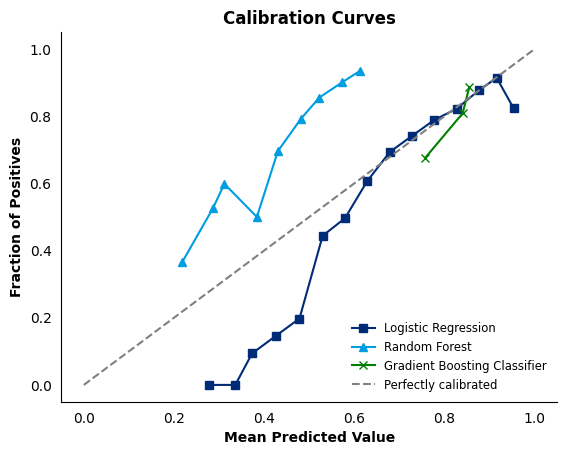

In [100]:
from sklearn.calibration import calibration_curve

bins = 20 # Number of bins

# Generate calibration curve for logistic regression
logistic_reg_fitted_fraction_of_positives, logistic_reg_fitted_mean_predicted_value = calibration_curve(y_train, logistic_reg_fitted_pred_proba, n_bins=bins)

# Generate calibration curve for random forest
random_forest_fraction_of_positives, random_forest_mean_predicted_value = calibration_curve(y_train, random_forest_train_pred, n_bins=bins)

# Generate calibration curve for gradient boosting classifier
gbm_fraction_of_positives, gbm_mean_predicted_value = calibration_curve(y_train, gbm_train_pred, n_bins=bins)

# Plot the calibration curves
plt.plot(logistic_reg_fitted_mean_predicted_value, logistic_reg_fitted_fraction_of_positives, 's-', label='Logistic Regression')
plt.plot(random_forest_mean_predicted_value, random_forest_fraction_of_positives, '^-', label='Random Forest')
plt.plot(gbm_mean_predicted_value, gbm_fraction_of_positives, 'x-', color='green',label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')

plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend(loc='lower right')
plt.show()


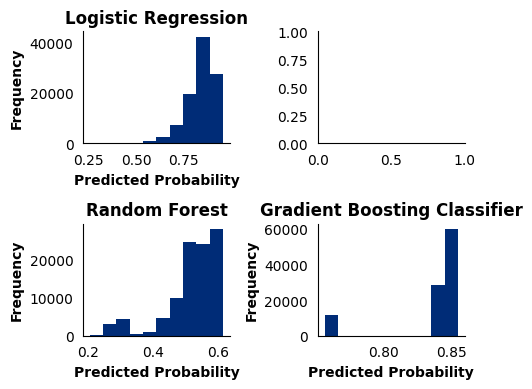

In [101]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(5, 4))

# Plot histogram for logistic regression
axs[0, 0].hist(logistic_reg_fitted_pred_proba, bins=10)
axs[0, 0].set_title('Logistic Regression')
axs[0, 0].set_xlabel('Predicted Probability')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for random forest
axs[1, 0].hist(random_forest_train_pred, bins=10)
axs[1, 0].set_title('Random Forest')
axs[1, 0].set_xlabel('Predicted Probability')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for gradient boosting classifier
axs[1, 1].hist(gbm_train_pred, bins=10)
axs[1, 1].set_title('Gradient Boosting Classifier')
axs[1, 1].set_xlabel('Predicted Probability')
axs[1, 1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


**Use CalibratedClassifierCV to calibrate Random Forest and GBM**

See link for the methods (curve shapes) https://scikit-learn.org/stable/modules/calibration.html#calibrating-a-classifier 

In [102]:
from sklearn.calibration import CalibratedClassifierCV

# Calibrate random forest classifier
calibrated_random_forest = CalibratedClassifierCV(random_forest_model_fitted, method='sigmoid')
calibrated_random_forest.fit(X_train[x_variables], y_train)

# Calibrate gradient boosting classifier
calibrated_gbm = CalibratedClassifierCV(gradient_boosting_model_fitted, method='sigmoid')
calibrated_gbm.fit(X_train[x_variables], y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8695            1.09m
         2           0.8643            1.02m
         3           0.8613           54.79s
         4           0.8613           50.80s
         5           0.8613           47.16s
         6           0.8613           48.94s
         7           0.8613           50.79s
         8           0.8613           48.21s
         9           0.8613           47.82s
        10           0.8613           49.71s
        20           0.8613           49.29s
      Iter       Train Loss   Remaining Time 
         1           0.8696           44.51s
         2           0.8646           39.29s
         3           0.8616           36.96s
         4           0.8616           35.85s
         5           0.8616           33.69s
         6           0.8616           32.70s
         7           0.8616           32.83s
         8           0.8616           31.43s
         9           0.8616           31.56s
        

CalibratedClassifierCV(estimator=GradientBoostingClassifier(ccp_alpha=0.001,
                                                            learning_rate=0.2,
                                                            max_depth=5,
                                                            max_features=0.5,
                                                            min_impurity_decrease=0.01,
                                                            min_samples_leaf=0.1,
                                                            min_samples_split=0.1,
                                                            n_estimators=500,
                                                            n_iter_no_change=20,
                                                            random_state=10000,
                                                            subsample=1,
                                                            tol=0.01,
                                                            verbose=1))

**Generate the predicted probabilities**

In [103]:
# Predict probabilities using calibrated random forest
calibrated_random_forest_pred_proba = calibrated_random_forest.predict_proba(X_train[x_variables])[:,1]

# Predict probabilities using calibrated gradient boosting classifier
calibrated_gbm_pred_proba = calibrated_gbm.predict_proba(X_train[x_variables])[:,1]


**Check the calibration curve**

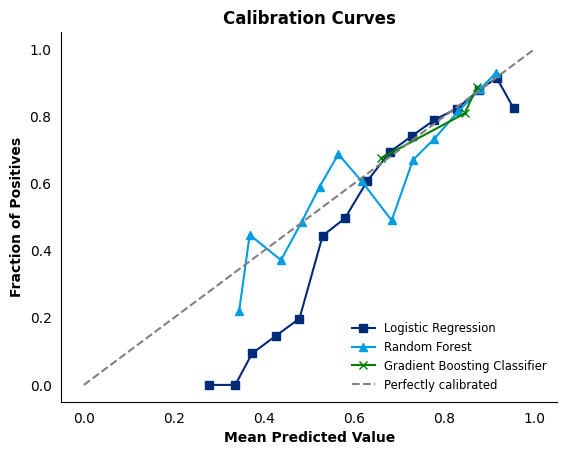

In [104]:
from sklearn.calibration import calibration_curve

bins = 20 # Number of bins

# Generate calibration curve for logistic regression
logistic_reg_fitted_fraction_of_positives, logistic_reg_fitted_mean_predicted_value = calibration_curve(y_train, logistic_reg_fitted_pred_proba, n_bins=bins)

# Generate calibration curve for random forest
random_forest_fraction_of_positives, random_forest_mean_predicted_value = calibration_curve(y_train, calibrated_random_forest_pred_proba, n_bins=bins)

# Generate calibration curve for gradient boosting classifier
gbm_fraction_of_positives, gbm_mean_predicted_value = calibration_curve(y_train, calibrated_gbm_pred_proba, n_bins=bins)

# Plot the calibration curves
plt.plot(logistic_reg_fitted_mean_predicted_value, logistic_reg_fitted_fraction_of_positives, 's-', label='Logistic Regression')
plt.plot(random_forest_mean_predicted_value, random_forest_fraction_of_positives, '^-', label='Random Forest')
plt.plot(gbm_mean_predicted_value, gbm_fraction_of_positives, 'x-', color='green',label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')

plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend(loc='lower right')
plt.show()


# Create a CSV file with inputs and predictions

In this simple example, we generate predictions on the test dataset, merge them into the original data, and save the results

In [105]:
logistic_test = logistic_reg_fitted.predict_proba(X_test[original_x_variables])[:, 1]

# Predict probabilities using calibrated random forest
rf_test = calibrated_random_forest.predict_proba(X_test[x_variables])[:,1]

# Predict probabilities using calibrated gradient boosting classifier
gbm_test = calibrated_gbm.predict_proba(X_test[x_variables])[:,1]

**Get the rows associated with test data, and add these columns**

In [106]:
test_outputs = dataset.iloc[X_test.index.values].copy().reset_index(drop=True)

In [107]:
test_outputs['pred_logistic'] = logistic_test
test_outputs['pred_randomforest'] = rf_test
test_outputs['pred_gbm'] = gbm_test

In [108]:
test_outputs.to_csv("sample_output/sample_predictions.csv",index=False)

**This is used in the model plotting template**